# CodeAlpha Internship Domain: Data Science
# Task - 1 : Titanic Classification
# Name : AYUSH SINGH

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# load the data from csv file to Pandas DataFrame
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Printing the first 5 rows of the dataframe

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
#Some information about train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Number of Rows and Columns

In [35]:
train_data.shape

(891, 12)

In [36]:
#Checking the null Values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Managing absent data

In [37]:
train_data = train_data.drop(columns='Cabin', axis=1)

In [38]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [39]:
print(train_data['Embarked'].mode())
print(train_data['Embarked'].mode()[0])

0    S
Name: Embarked, dtype: object
S


In [40]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [41]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

In [17]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

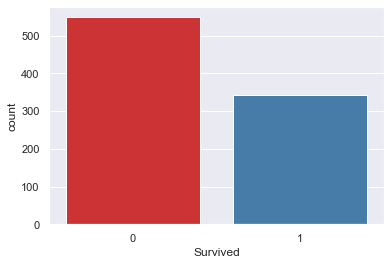

In [44]:
sns.countplot(data=train_data, x="Survived", palette='Set1')

<AxesSubplot:xlabel='Sex', ylabel='count'>

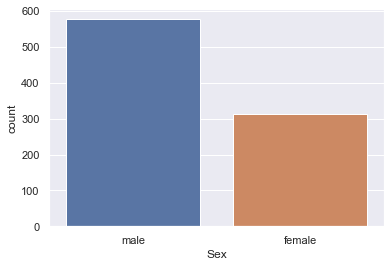

In [46]:
sns.countplot(data=train_data, x="Sex")


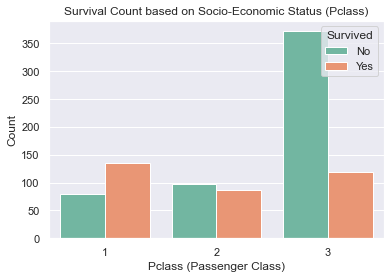

In [47]:
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set2') 
plt.title('Survival Count based on Socio-Economic Status (Pclass)') 
plt.xlabel('Pclass (Passenger Class)') 
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

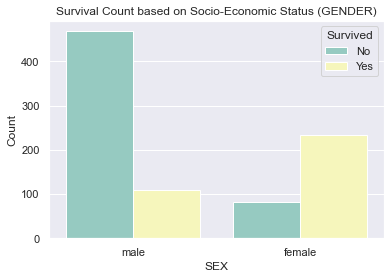

In [48]:
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set3')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('SEX') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

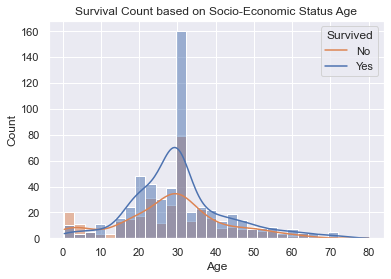

In [49]:
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True) 
plt.title('Survival Count based on Socio-Economic Status Age') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

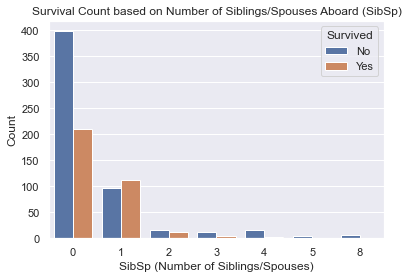

In [50]:
sns.countplot(x='SibSp', hue='Survived', data=train_data) 
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)') 
plt.xlabel('SibSp (Number of Siblings/Spouses)') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

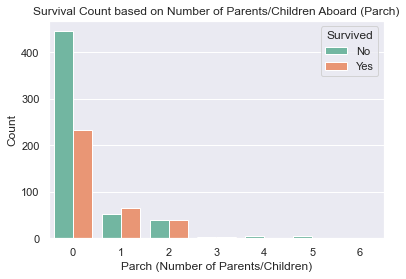

In [51]:
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='Set2') 
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)') 
plt.xlabel('Parch (Number of Parents/Children)') 
plt.ylabel('Count') 
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.show()

# Converting the Categorical Feature into Numerical Representation

In [52]:
X = train_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = train_data['Survived']

In [53]:
X.shape

(891, 7)

In [54]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [55]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [56]:
X['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [60]:
transformer=ColumnTransformer(transformers=[('encode',OneHotEncoder(sparse=False,drop='first'),[1,6])] ,remainder='passthrough')

In [61]:
X = transformer.fit_transform(X)

In [62]:
X

array([[ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

# Spliting the train_data into training, testing data to create a model

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=49)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


# Model Building

In [67]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)


# Prediction for splited test data  

In [70]:
Y_prediction = model.predict(X_test)
Y_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0], dtype=int64)

# Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_prediction)
cm

array([[97, 17],
       [16, 49]], dtype=int64)

<AxesSubplot:>

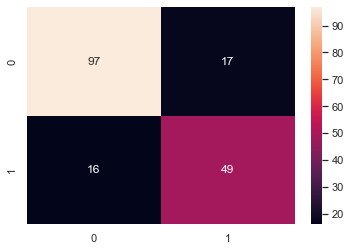

In [72]:
sns.heatmap(cm, annot=True)

In [73]:
from sklearn.metrics import classification_report
report = classification_report (Y_test, Y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       114
           1       0.74      0.75      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



# Data Preprocessing for the file "test.csv" to test the Model

In [74]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
test_data.shape

(418, 11)

In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [79]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [80]:
test_data = test_data.drop(columns='Cabin', axis=1)

In [81]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [82]:
X_test = train_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

In [83]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [84]:
transformer_test=ColumnTransformer(transformers=[('encode',OneHotEncoder(sparse=False,drop='first'),[1,6])] ,
                                   remainder='passthrough')

In [85]:
feature = transformer_test.fit_transform(X_test)

In [86]:
feature

array([[ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

# Predicting the survival of passengers from the above created model

In [87]:
feature_result = model.predict(feature)
feature_result

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

# Thank you for examining my work! Please don't hesitate to contact me if you have any inquiries or suggestions.

# Wishing you the best of luck with your predictions!